### Blahaj Crypto basic training

Hi. This jupyter notebook contains basic crypto concepts. This was made by tomato (`@tomatoed` on discord) for BlahajCTF 2024 crypto training lecture.

1. Bits, bytes, encodings

2. Binary operations specifically XOR

3. Block ciphers

Please install pycryptodome: `pip install pycryptodome` (import it as `Crypto`)

Great resource after (or even instead of) this:
https://cryptohack.org/

#### 1. Letters are numbers

The most basic unit of information in a computer is a bit. It has two states, 0 or 1 aka on or off. A computer reads everything through bits, so its important to see how we can represent useful data as bits. For example, numbers can be converted to binary (e.g. 9 = 1001) and hence stored as such. But what about letters like the ones in this sentence? How do we store them?

Here is an example of a bunch of bits:

`011110010111001001100011`

A group of 8 bits is called a "byte", so there are 3 bytes here (group it up like this: `01111001` `01110010` `01100011`) Now we can look into how we can use bytes to store letters.

![image.png](https://upload.wikimedia.org/wikipedia/commons/1/1b/ASCII-Table-wide.svg)

ASCII is a standard used by computers to correspond between characters and numbers. We can use the ASCII table as shown above to lookup what number a letter corresponds to, e.g. `c` is 99. In python, there are in-built functions:

`chr()` which converts a number to its letter

`ord()` which converts a letter to its number

For example:

In [1]:
print("The letter c corresponds to the number", ord('c'))
print("The number 99 corresponds to the letter", chr(99))

The letter c corresponds to the number 99
The number 99 corresponds to the letter c


Ok, but how would we convert a string of letters like "cry" into a number? Lets recap on how bases work to get inspiration:

The number 99 is represented as `99` in base-10 because $99 = 9 \times 10^1 + 9 \times 10^0$

The number 5 is represented as `101` in base-2 because $5 = 1 \times 2^2 + 0 \times 2^1 + 1 \times 2^0$


We can treat ASCII as base-256 essentially, with each byte storing one letter. Since

`c` is 99 = `01111001`

`r` is 114 = `01110010`

`y` is 121 = `01111001`

To get the binary representation of `cry`, we can concatenate the above to form

`01111001 01110010 01111001`

Mathematically, according to the base system, this number would be equal to

$99 \times 256^2 + 114 \times 256^1 + 121 \times 256^0 = 6517369$

Which is essentially

$\textit{c} \times 256^2 + \textit{r} \times 256^1 + \textit{y} \times 256^0$

Here, we have the first letter of the string (`c`) as the most significant part of the number (being in the "hundreds" place). This type of encoding is called "big-endian".

Another type of encoding is called "little-endian", where you go in the reverse direction, having the last letter in the most significant position. For `cry`, it would be

$\textit{c} \times 256^0 + \textit{r} \times 256^1 + \textit{y} \times 256^2$


In [2]:
# Exercise 1.1
# Using the ord function and arithmetic, convert the message "dog" into a number using big-endian.
# Answer should be: 6582119







<details>

<summary>Solution</summary>

```python
ord("d") * 256 ** 2 + ord("o") * 256 + ord("g")
```
</details>

To convert between strings and numbers, there are already implemented functions to help you do so. But first, for any string, you will have to encode it into bytes first, using `.encode()`.

In [3]:
# string -> bytestring
msg = "abcde"
msg_bytes = msg.encode()
# ALTERNATIVELY, put a 'b' before the string:
assert msg_bytes == b"abcde"
# this can be treated as a list of ints
for i in msg_bytes: print(i)

97
98
99
100
101


If you have a list of ints, you can use the function `bytes` to convert it into a bytestring:

In [4]:
print(bytes([99,114,121]))

b'cry'


Then, you can use one of the following to convert between python byte-strings and python ints:

In [5]:
# 1. Using builtin int function
msg = "cat"
msg_bytes = msg.encode()
num = int.from_bytes(msg_bytes, byteorder="big")

# bytestring -> number
print(msg, "=", num)

num = 6648929
msg_bytes = int.to_bytes(num, length=(num.bit_length() + 7) // 8, byteorder="big")
msg = msg_bytes.decode()

# number -> bytestring
print(num, "=", msg)

cat = 6513012
6648929 = eta


In [6]:
# 2. Using pycryptodome's util functions
from Crypto.Util.number import long_to_bytes, bytes_to_long
msg = "cat"
msg_bytes = msg.encode()
num = bytes_to_long(msg_bytes)

# bytestring -> number
print(msg, "=", num)

num = 6648929
msg_bytes = long_to_bytes(num)
msg = msg_bytes.decode()

# number -> bytestring
print(num, "=", msg)

cat = 6513012
6648929 = eta


If a message is encoded in hex, there's a nice in-built function to convert it into bytes, `bytes.fromhex`. To convert back to hex, you can do `bytes.hex`.

In [7]:
msg = "cat"
msg_bytes = msg.encode()
msg_hex = msg_bytes.hex()

# bytestring -> hex
print(msg, "in hex =", msg_hex)

msg_hex = "657461"
msg_bytes = bytes.fromhex(msg_hex)
msg = msg_bytes.decode()

# hex -> bytestring
print(msg_hex, "=", msg, "in hex")

cat in hex = 636174
657461 = eta in hex


In [8]:
# Exercise 1.2
# For each letter in the following string, replace it with the next character in ASCII order
# For example, A = 65, so after that is B = 66
# Z = 90, so after that is Z = 91

string = "A to Z () [] {}"

<details>

<summary>Hint</summary>

Use `encode` to turn it into a bytestring, then you can loop over it as if its a list.

</details>
<details>

<summary>Solution</summary>

```python
string = bytes([i+1 for i in string.encode()]).decode()
```
</details>

In [9]:
# Exercise 1.2
# Extract the strings from these various encodings!

# 0x6e65772068616972

# 31073809758184805

# 0b11011100110010101110111001000000110101001100101011000010110111001110011 (hint: int function?)

# ZG8geW91IHNlZQ== (bonus)





<details>

<summary>Hint</summary>

Pay attention to the prefixes to these. For the last one, its a suffix

</details>

<details>

<summary>Solution</summary>

```python
print(bytes.fromhex("0x6e65772068616972"[2:]))

print(long_to_bytes(31073809758184805))

print(long_to_bytes(int("0b11011100110010101110111001000000110101001100101011000010110111001110011",2)))

import base64
print(base64.b64decode("ZG8geW91IHNlZQ=="))
```

</details>

#### 2. Bitwise operations

AND operator:

1 & 1 = 1

1 & 0 = 0

0 & 1 = 0

0 & 0 = 0

The output is only ever 1 if both inputs are also 1.

XOR operator:

(I'll use `^` here since that's the python syntax to xor (NOT exponentiate))

1 ^ 1 = 0

1 ^ 0 = 1

0 ^ 1 = 1

0 ^ 0 = 0

You can think of the xor operator as one of these:
- Summing modulo 2
- "Are the two inputs unequal?"
- "Based on the second input, do I flip the first input?"

Important XOR properties:

Commutative:

$ A \oplus B = B \oplus A $

Associative:

$ A \oplus (B \oplus C) = (A \oplus B) \oplus C $

Identity:

$ A \oplus 0 = A $

Self-inverse (involution):

$ A \oplus A = 0 $

Important observation:

$ (A \oplus B) \oplus A = B $

Could we use xor to encrypt a message?

In [10]:
# You can also import a similar xor function from external library pwntools which is very useful for CTF
# This function XOR's two bytestrings by XORing them byte by byte. If one bytestring is shorter, it cycles through the shorter one.

def xor(b1: bytes, b2: bytes) -> bytes:
    L = max(len(b1), len(b2))
    return bytes(b1[i % len(b1)] ^ b2[i % len(b2)] for i in range(L))

In [11]:
# Exercise 2.1
# I encrypted my secret letter by ANDING it with random numbers!

from os import urandom

# secret = ???
# for _ in range(16):
#     binary = bin(secret[0] & urandom(1)[0])
#     binary = binary[2:] # remove the 0b
#     print(binary.zfill(8)) # fill with zeros on the left

# 01010000
# 01001000
# 00001000
# 01010000
# 00000000
# 00001000
# 00001000
# 01011000
# 00001000
# 00011000
# 00001000
# 00011000
# 00000000
# 00010000
# 00010000
# 01010000

In [12]:
# Exercise 2.1
# I encrypted my secret message by XORing it with a key!
# Can you recover my secret?

# secret = b"..."
# assert len(key) == 1
# encrypted = xor(secret, key)

encrypted = b'lX\x01JDX\x01LTRU\x01CD\x01UNN\x01VD@J\x0f\x0f\x0f'

<details>

<summary>Hint</summary>

Remember that XOR is an involution.

$ (A \oplus B) \oplus B = A $

</details>

<details>

<summary>Hint 2</summary>

The same byte is repeated over and over in the key before XORing

</details>

<details>

<summary>Solution</summary>

There are only 256 possible bytes to try, just try each one. Since XOR is an involution, just XOR the ciphertext with the single byte to get the plaintext back.

</details>


In [13]:
# Exercise 2.2
# The previous key was too weak. Now, its 6 bytes!
# Can you recover my secret?
# Secret follows format b"blahaj{...}"

# from os import urandom
# secret = b"blahaj{...}"
# key = urandom(6)
# assert len(key) == 6
# encrypted = xor(secret, key)

encrypted = b"\\# \x8ej\x05E)-\x87l0X 3\x8bj\x1ba#$\x87`\nZ\x10(\x92T\x1cS'o\xc8%\x12"

<details>

<summary>Hint</summary>

The flag format is important

</details>

<details>

<summary>Solution</summary>

The first 6 bytes which are known, `blahaj` are XORed with the key. Hence, by XORing the first 6 bytes of the ciphertext with `blahaj`, you get the key.

</details>

In [14]:
# Exercise 2.3 (hard)
# XORshift is an operation where a number is XORed with a shifted version of itself.
# In this case, we can just shift the position of a message within bytes.
# "0secret"
# ⊕
# "secret0"

# secret = b"......"
# assert len(secret) == 6
# # appending 1 zero-byte to the start or end: (Remember, A ⊕ 0 = A)
# L = secret + b"\00"
# R = b"\00" + secret
# encrypted = xor(L, R)

encrypted = b'y\x1c\x16\x00\x1a\x1br'

<details>

<summary>Hint</summary>

Let the string characters be:

$x_1, x_2, x_3, \cdots, x_n$

The first byte of the encrypted data is $x_1 \oplus 0 = x_1$

The last is $0 \oplus x_n = x_n$

The second one is what?

</details>

<details>

<summary>Solution</summary>

The first output byte is $x_1$

The second output byte is $x_1 \oplus x_2$

XOR this with $x_1$ to get $x_2$

The third output byte is $x_2 \oplus x_3$

XOR this with $x_2$ to get $x_3

etc.

</details>

#### 3. Block ciphers

A block cipher like AES runs on blocks. For AES, the block size is 16 blocks. This means that the encryption solely focuses on one block at a time. For AES-128, this would be encrypting a 16-byte plaintext with a 16-byte key, to produce a 16-byte ciphertext. AES is a symmetric cipher, meaning that the same key can be used to then decrypt that 16-byte ciphertext into the original 16-byte plaintext.

Why does it run on blocks and not entire plaintexts? Because the AES algorithm was designed to screw with the plaintext in such weird ways (based on the key), that it would not be possible to reverse without the key. There needs to be a fixed number of things to screw with, otherwise it starts taking too long to screw with it. That's why we choose a nice size of 16 bytes (128 bits, 3 * 10^38 possibilities) to block with.

Some messages may not be a multiple of 16 bytes. So, they have to be padded to a multiple of 16 bytes before encrypting. This is done by appending certain data at the end of it.

It may seem obvious how to encrypt data from here. Just block it up into 16-byte blocks and then encrypt each directly right? Well, this is called "ECB" mode of encryption:

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/ECB_encryption.svg/1920px-ECB_encryption.svg.png)

But, this has issues. If a block repeats, then the ciphertext would be the same, since the encryption is deterministic.

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Tux_encrypted_ecb.png/800px-Tux_encrypted_ecb.png)

In the above image, similar pixels have similar outputs, making the shape of the penguin still discernible after encryption, which makes it vulnerable. The most used (and therefore secure) mode of encryption is known as CBC:

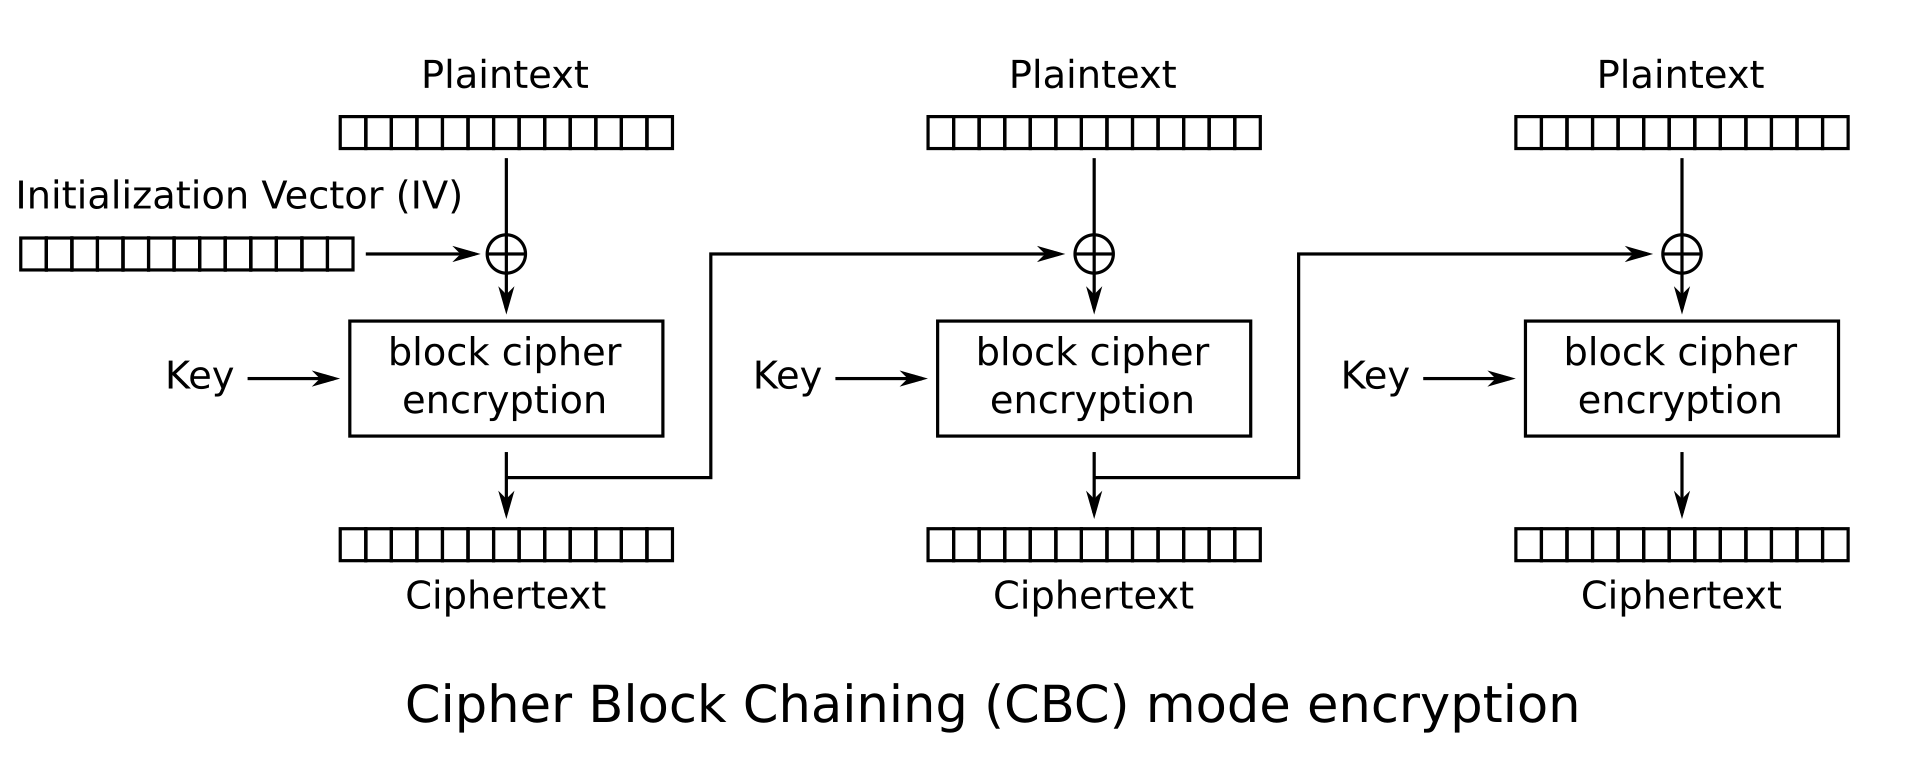

Here, we XOR the previous ciphertext block with the next plaintext block before applying the cipher encryption. This accomplishes two things.

1. It becomes more secure since it is very unlikely you will ever encrypt the same block twice, since the ciphertext is gibberish.
2. It is still reversible during decryption, just do block cipher decryption, then XOR it with the visible previous ciphertext block.

But, you may notice that the first block has an "IV". This is because without it, the first block would always face the same issues with ECB, if you encrypted two different messages with the same key, that happened to have the same block, the first output ciphertext block would also be the same. Hence, the IV is a randomly generated bytestring that is attached to the ciphertext, to introduce variance before the cipher encryption is applied.

In [15]:
# Exercise 3.1
# Here is an encryption oracle (Just use the oracle_enc function, don't peek at the AES key, treat it as a "black box")
# I'm thinking of a two-digit number... But i'm not letting you brute force it!
# I'm gonna screw up the rest of the message so you can't just test every message...


from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from os import urandom

def oracle_enc(msg: str):
    # IGNORE following line
    KEY = bytes([pow(3,i,77) for i in range(16)])
    # IGNORE above line
    cipher = AES.new(key=KEY, mode=AES.MODE_ECB)
    return cipher.encrypt(pad(msg, block_size=16))

# random_mess = urandom(8)
# message = b"The secret is (ignore " + random_mess + b"):??"
# # The "??" is the two-digit number
# encrypted = oracle_enc(message)

encrypted = b'I<\n\xd0\n\x9b\xa5\x12\xddK\x18"r\xd8\xb0\xf1\xf9A\x97\xd3\xca\xa9*$1oME(tXv\xe6:Xx$2\x1d\x93V\xcc\xc1\\\x1e\xc5\x96\xa8'

<details>

<summary>Hint</summary>

The mode ECB is important

</details>

<details>

<summary>Hint 2</summary>

Group the message into blocks

</details>

<details>

<summary>Solution</summary>

The last block is just the random 2-digit number followed by the padding. Just try all 100 2-digit numbers and encrypt them directly, and compare with the last (16-byte) block of the ciphertext.

</details>